# QuanEstimation : single parameter estimation

We consider a system whose Hamiltonian is $H = \frac{1}{2}\omega_0 \sigma_z$, where $\sigma_z$ is a Pauli matrix.

The dynamics of the system is governed by
$\partial_t\rho=-i[H, \rho]+ \frac{\gamma}{2}(\sigma_z\rho\sigma_z-\rho)$.

Preparing the probe state at $|+\rangle$, the final state at $T$ in the Bloch representation is given by $\vec{r}(T)=(r_1(T),r_2(T),r_3(T))$ with

$r_1(T)=e^{-\gamma T}\sin(\omega_0 \Delta t)\sin(\omega_0 t_0) $,

$r_2(T)=e^{-\gamma T}\cos(\omega_0 \Delta t)\sin(\omega_0 t_0) $,

$r_3(T)=e^{-\gamma t_0}\sin(\omega_0 t_0) $,

and $\Delta t$ is the time step.

We can obtain the QFI 

$F(T) = e^{-2\gamma t_0}t_0^2 \sin^2 (\omega_0 t_0) + e^{-2\gamma T}[t_0^2+T(T-2t_0)\sin^2(\omega_0 t_0)] 
      + \frac{t_0^2(e^{-2\gamma T}-e^{-2\gamma t_0})^2\sin^2(\omega_0 t_0) \cos^2(\omega_0 t_0)}
          {1-e^{-2\gamma T}\sin^2(\omega_0 t_0)-e^{-2\gamma t_0} \cos^2(\omega_0 t_0)}$.

The measurement for CFI is $\{|+\rangle\langle+|, |-\rangle\langle-|\}$.

$\textbf{References}$

[1] J. Liu and H. Yuan, Phys. Rev. A $\textbf{96}$, 012227 (2017).

Use trained data (by GRAPE) to plot QFI-t figure.

In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as scylin
from time import time
import pyximport;pyximport.install()
import os
from datetime import datetime

from AsymptoticBound.CramerRao import CramerRao
from Dynamics.dynamics import Lindblad
from Control.GRAPE import GRAPE
from Common.common import mat_vec_convert, Liouville_commu, Liouville_dissip, dRHO

omega0 = 1.0
gamma = [0.05]
T = 5.0
tnum = 2500
tspan = np.linspace(0, T, tnum)
dt = tspan[1]-tspan[0]
cnum = tnum
vx = 0.5*np.ones(cnum)
vy = 0.5*np.ones(cnum)
vz = 0.5*np.ones(cnum)

sx = np.array([[0.+0.j, 1.+0.j],[1.+0.j, 0.+0.j]])  
sy = np.array([[0.+0.j, 0.-1.j],[0.+1.j, 0.+0.j]]) 
sz = np.array([[1.+0.j, 0.+0.j],[0.+0.j, -1.+0.j]])
sp, sm = 0.5*(sx+1.j*sy), 0.5*(sx-1.j*sy)

#initial state
psi0 = np.array([[1.+0.j],[0.+0.j]])
psi1 = np.array([[0.+0.j],[1.+0.j]])
psi_p = (psi0+psi1)/np.sqrt(2)
psi_m = (psi0-psi1)/np.sqrt(2)
rho0 = np.dot(psi_p, psi_p.conj().T)
dim = len(rho0)

#time independent Hamiltonian
H0 = 0.5*omega0*sz
dH0 = [0.5*sz]

#control Hamiltonian
Hc_ctrl = [sx,sy,sz]
Hc_coeff = [vx,vy,vz]

#measurement
M1 = np.dot(psi_p, psi_p.conj().transpose())
M2 = np.dot(psi_m, psi_m.conj().transpose())
M  = [M1, M2]

CRB = CramerRao()

Lvec = [sz]
GRAPE = GRAPE(tspan, rho0, H0, Hc_ctrl, dH0, Hc_coeff, Lvec, gamma)
episode = 1000
save_num = 5

#==========================================================
dayTime = datetime.now().date().strftime('%Y%m%d')
path = str(dayTime)+'test_GRAPE'

isexists=os.path.exists(path)
if not isexists:
    os.makedirs(path)
if os.path.exists('./'+path+'/'+'vx_ctrl.txt'):
    os.remove('./'+path+'/'+'vx_ctrl.txt')
if os.path.exists('./'+path+'/'+'vy_ctrl.txt'):
    os.remove('./'+path+'/'+'vy_ctrl.txt')
if os.path.exists('./'+path+'/'+'vz_ctrl.txt'):
    os.remove('./'+path+'/'+'vz_ctrl.txt')
#==========================================================

for round_i in range(episode):
    GRAPE.GRAPE_QFI()
    #GRAPE.GRAPE_CFIM(M, None)
    if round_i%save_num == 0 or round_i == episode-1:
        fvx = open('./'+path+'/'+'vx_ctrl.txt','a')
        fvx.write('\n')
        np.savetxt(fvx, np.array(GRAPE.control_coeff_total[0]).T)
        fvx.close()
        
        fvy = open('./'+path+'/'+'vy_ctrl.txt','a')
        fvy.write('\n')
        np.savetxt(fvy, np.array(GRAPE.control_coeff_total[1]).T)
        fvy.close()
        
        fvz = open('./'+path+'/'+'vz_ctrl.txt','a')
        fvz.write('\n')
        np.savetxt(fvz, np.array(GRAPE.control_coeff_total[2]).T)
        fvz.close()
        
        f = GRAPE.Ffinal
        print(round_i,f)


0 5.905666789862469
5 6.203552409326596
10 6.469517078887643
15 6.702319503106301
20 6.9025638587986355
25 7.072568103757135
30 7.215613582855081
35 7.335004568174887
40 7.433763580757895
45 7.516249827100916
50 7.5871701838559495
55 7.649565698565856
60 7.705975898694627
65 7.757657667534522
70 7.805047201543751
75 7.848783708477038
80 7.889750630078479
85 7.928795747218411
90 7.966615483269056
95 8.003751107152091
100 8.04062037939335
105 8.0775540311322
110 8.114826675347398
115 8.152679520675992
120 8.191335330380767
125 8.231007096030355
130 8.271902244376092
135 8.314224517305409
140 8.358176053582765
145 8.40396238963313
150 8.451802620100636
155 8.501945182694707
160 8.554685611106713
165 8.610374467831729
170 8.669390622137247
175 8.732044146140877
180 8.798381985632002
185 8.86779942079174
190 8.937756863852254
195 9.003004282716663
200 9.057182004064229
205 9.092175225535254
210 9.109428672960126
215 9.118921521749396
220 9.123520988898196
225 9.129984558566914
230 9.1324054

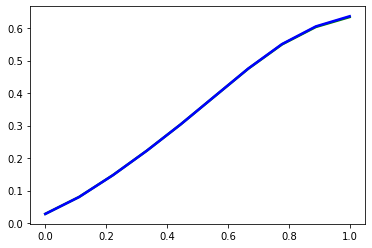

In [5]:
%reset -f
import numpy as np
from scipy import linalg as scylin
import matplotlib.pyplot as plt

from AsymptoticBound.CramerRao import CramerRao
from Common.common import mat_vec_convert, Liouville_commu, Liouville_dissip, dRHO

VX_ = np.loadtxt('./'+'20201217test_GRAPE'+'/'+'vx_ctrl.txt')
VY_ = np.loadtxt('./'+'20201217test_GRAPE'+'/'+'vy_ctrl.txt')
VZ_ = np.loadtxt('./'+'20201217test_GRAPE'+'/'+'vz_ctrl.txt')

omega0 = 1.0
gamma = [0.05]
T = 1
tnum = 10
tspan = np.linspace(0,T, tnum)
dt = tspan[1]-tspan[0]
cnum = tnum
vx = 1.0*np.ones(cnum)
vy = 1.0*np.ones(cnum)
vz = 1.0*np.ones(cnum)

sx = np.array([[0,1],[1,0]])  
sy = np.array([[0,-1j],[1j,0]]) 
sz = np.array([[1,0],[0,-1]])
sp, sm = 0.5*(sx+1j*sy), 0.5*(sx-1j*sy)

#initial state
psi0 = np.array([[1],[0]])
psi1 = np.array([[0],[1]])
psi_p = (psi0+psi1)/np.sqrt(2)
psi_m = (psi0-psi1)/np.sqrt(2)
rho0 = np.dot(psi_p, psi_p.conj().T)
dim = len(rho0)

#time independent Hamiltonian
H0 = 0.5*omega0*sz
dH0 = [0.5*sz]

# Hilbert space to liouvillian
H0_L = Liouville_commu(H0)

dH0_L = Liouville_commu(dH0[0])
sx_L = Liouville_commu(sx)
sy_L = Liouville_commu(sy)
sz_L = Liouville_commu(sz)
c_ops  = Liouville_dissip(sz)

CRB = CramerRao()
index = [1,3,5]
qfi_round = []
for num in index:
    VX = VX_[num*tnum:(num+1)*tnum]
    VY = VY_[num*tnum:(num+1)*tnum]
    VZ = VZ_[num*tnum:(num+1)*tnum]
    state_pre = mat_vec_convert(rho0)
    d_state = np.array([[0.+0.*1.j] for i in range(0,dim**2)])
    qfi = []
    for ti in range(tnum):
        Hc_L = VX[ti]*sx_L + VY[ti]*sy_L + VZ[ti]*sz_L
        Liouv_tot = -1j*(H0_L+Hc_L) + gamma[0]*c_ops 
        state = np.dot(scylin.expm(dt*Liouv_tot), state_pre)
        rho = mat_vec_convert(state)

        A = -1j*np.dot(dH0_L, state_pre)
        d_state = dRHO(d_state, Liouv_tot, A, dt)
        d_rho = mat_vec_convert(d_state)
        drho = [d_rho]
    
        F_q = CRB.QFIM(rho, drho)
        state_pre = state
        qfi.append(F_q)
    qfi_round.append(qfi)
    
#plt.plot(tspan, qfi_round[0], 'r-', linewidth=2.5, label='QFI')
plt.plot(tspan, qfi_round[1], 'g-', linewidth=2.5, label='QFI')
plt.plot(tspan, qfi_round[2], 'b-', linewidth=2.5, label='QFI')
plt.show()